In [2]:
import pandas as pd
data_orig = pd.read_excel(r'../src/data/external/Dry_Bean_Dataset.xlsx', engine='openpyxl')

In [3]:
#datensatz vereinfachen
data_orig['Class'] = data_orig['Class']=='BARBUNYA'
labels = data_orig['Class']

data = data_orig.copy()

cols_to_keep = [7,12,13,14]
data = data.iloc[:,cols_to_keep]
data

,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,190.141097,0.007332,0.003147,0.834222
1,191.272750,0.006979,0.003564,0.909851
2,193.410904,0.007244,0.003048,0.825871
3,195.467062,0.007017,0.003215,0.861794
4,195.896503,0.006697,0.003665,0.941900
...,...,...,...,...
13606,231.515799,0.006858,0.001749,0.642988
13607,231.526798,0.006688,0.001886,0.676099
13608,231.631261,0.006681,0.001888,0.676884
13609,231.653248,0.006724,0.001852,0.668237


In [5]:
#daten skalieren und für scikit-learn vorbereiten

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)
#labes is pd.series mit values wird daraus nparray
y = labels.values

#Kreuzvalidierung
from sklearn.model_selection import StratifiedKFold
cv_splitter = StratifiedKFold(shuffle=True, random_state=42)

In [8]:
from sklearn.model_selection import cross_validate
# xgboost in Phyton benutzen
from xgboost import  XGBClassifier

model = XGBClassifier()
scores = cross_validate(
    model, X, y,
    cv = cv_splitter,
    scoring=['f1','precision','recall']
)
scores

C:\Users\Lukas\anaconda3\envs\biz_analytics_a\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:29:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

{'fit_time': array([0.2446394 , 0.25466824, 0.2416327 , 0.24163318, 0.25968051]),
 'score_time': array([0.00601602, 0.00701714, 0.00601602, 0.0060153 , 0.00701857]),
 'test_f1': array([0.7402863 , 0.74161736, 0.71635611, 0.75100402, 0.74898785]),
 'test_precision': array([0.80803571, 0.77366255, 0.78995434, 0.7991453 , 0.80786026]),
 'test_recall': array([0.68301887, 0.71212121, 0.65530303, 0.70833333, 0.69811321])}

In [9]:
#f1-Score ausgeben
scores['test_f1'].mean()

0.7396503267092409

In [10]:
#Daten splitten
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

#Wahrscheinlichkeiten ausrechnen
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=10)
model.fit(X_train,y_train)
model.predict_proba(X_test)

array([[0.88, 0.12],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

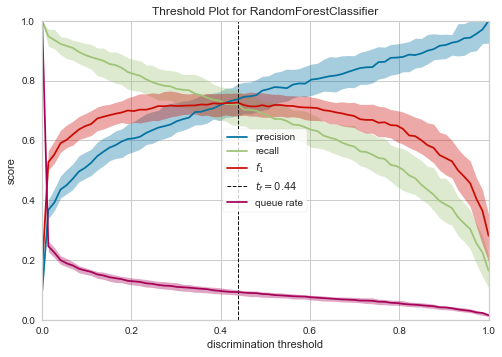

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [11]:
#Entscheidungsschwelle und zusammenhängende Metriken visualiseren
from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

visualizer = DiscriminationThreshold(model, random_state=42)
visualizer.fit(X_train,y_train)
visualizer.show()

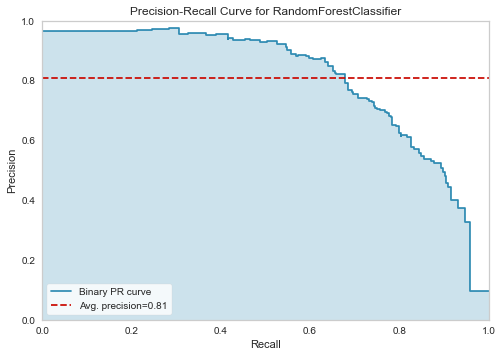

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [13]:
#Precision-Recall-Curve in Phyton
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = PrecisionRecallCurve(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()